# CRISP_DM

## 1. Comprensión empresarial

La base de datos contiene información relacionada con la Subred Integrada de Servicios de Salud de Bogotá e incluye variables sociodemográficas correspondientes a población menor de edad. Estos datos permiten inferir que se trata de una base orientada a intervenciones sociales dirigidas a población infantil y adolescente en condición de vulnerabilidad. Asimismo, se incorporan variables de georreferenciación que permiten ubicar con precisión a esta población en el territorio.

### Determinar los objetivos del negocio

#### Objetivo General  
Diseñar y validar un índice estadístico de riesgo social para la población infantil y adolescente de Bogotá, a partir de variables sociodemográficas, educativas y del entorno familiar, con el propósito de identificar niveles de vulnerabilidad social y entregar resultados cuantitativos que sirvan de insumo para posteriores decisiones.

#### Objetivos Específicos  
1. Definir y operacionalizar indicadores dentro de tres dimensiones principales del riesgo social: edad, nivel educativo y condiciones del hogar o entorno.

2. Construir un índice compuesto de riesgo social, estandarizando y ponderando los indicadores seleccionados.

3. Ajustar un modelo explicativo tipo GLM (Modelo Lineal Generalizado) para estimar el efecto estadístico de cada dimensión en la probabilidad de vulnerabilidad.

4. Validar el índice mediante métricas estadísticas, garantizando su robustez e interpretabilidad.

5. Entregar los resultados de análisis y modelado, sin proponer estrategias de intervención, dejando dicha interpretación a los especialistas en el área social.

### Evaluar la situación

#### Recursos Disponibles
- Base de datos estructurada con 115 columnas de tipo sociodemográfico, de salud, educativo y territorial.  
- Variables potenciales: edad, nivel educativo, afiliación al sistema de salud, composición del hogar y alertas psicosociales.
- Información georreferenciada (localidad, UPZ/UPR, barrio, manzana del cuidado).

#### Riesgos y Contingencias
- Calidad de datos: presencia de valores faltantes, duplicados o inconsistencias en codificación.  
- Aspectos legales y éticos: uso responsable y anonimizado de datos sensibles de menores de edad.  
- Posibles limitaciones alcance estadístico del trabajo sin validación en campo, en la actualización y periodicidad de los registros.

#### Alcancer del Trabajo
- El equipo estadístico se limita a la fase analítica y de modelado predictivo, entregando un conjunto de resultados cuantitativos y visuales (tablas, modelos, gráficos, métricas). La interpretación contextual y toma de decisiones corresponde a los profesionales del área social o institucional.

### Determinar los objetivos de la minería de datos

#### Objetivos de la Minería de Datos
- Construcción del Índice de Riesgo Social (IRS): basado en tres dimensiones:

->Demográfica: edad y grupo etario.

->Educativa: nivel educativo y asistencia escolar.

->Familiar/Social: composición del hogar y alertas psicosociales.

- Modelado Predictivo: Construir un modelo de riesgo social que estime la probabilidad de que un menor presente condiciones de vulnerabilidad, explicando qué variables influyen más en esa probabilidad.Uso de un GLM binomial o ordinal para estimar la influencia de las variables en el nivel de riesgo, interpretando los betas como evidencia estadística.

- Validación: evaluación del ajuste del modelo e interpretación de resultados mediante indicadores estadísticos, sin emitir juicios de política o intervención.

### Elaborar un plan de proyecto

#### Tecnologías y Herramientas
- Python: pandas, scikit-learn, statsmodels (GLM).

#### Fases
1. Preparación de datos: limpieza, estandarización de nombres de columnas y validación de calidad.  
2. Exploración inicial: análisis descriptivo de variables sociodemográficas, de salud y educativas.
3. Selección de variables por dimensión (edad, educación, hogar).
4. Construcción del índice compuesto de riesgo social (inicialmente GLM).  
6. Ajuste del modelo GLM e interpretación de coeficientes.
7. Presentación de resultados estadísticos y visuales.

## 2. Entedimiento de la base

### Recopilar datos iniciales


In [ ]:
# Cargar librerias
import pandas as pd
import numpy as np

# =============================================================================
# EXPLORAR ARCHIVO REAL:
# =============================================================================

print("📂 Cargando archivo base_datos_completa_NNA_TI_anon.xlsx - Hoja 'BD'...")

# Cargar el archivo Excel especificando la hoja 'BD'
df_bd = pd.read_excel('/content/base_datos_completa_NNA_TI_anon.xlsx', sheet_name='BD')

print(f"✅ Archivo cargado exitosamente en el DataFrame 'df_bd'!")
print(f"\n{'='*70}")
print("📊 INFORMACIÓN GENERAL DEL ARCHIVO")
print(f"{'='*70}")
print(f"Número de filas: {len(df_bd)}")
print(f"Número de columnas: {len(df_bd.columns)}")

📂 Cargando archivo base_datos_completa_NNA_TI_anon.xlsx - Hoja 'BD'...
✅ Archivo cargado exitosamente en el DataFrame 'df_bd'!

📊 INFORMACIÓN GENERAL DEL ARCHIVO
Número de filas: 56473
Número de columnas: 115


In [ ]:
print(f"\n{'='*70}")
print("📋 COLUMNAS DISPONIBLES:")
print(f"{'='*70}")
for i, col in enumerate(df_bd.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n{'='*70}")
print("👀 PRIMERAS 5 FILAS:")
print(f"{'='*70}")
display(df_bd.head())

print(f"\n{'='*70}")
print("📈 TIPOS DE DATOS:")
print(f"{'='*70}")
print(df_bd.dtypes)

print(f"\n{'='*70}")
print("🔍 VALORES ÚNICOS EN COLUMNAS PRINCIPALES:")
print(f"{'='*70}")

text_columns = df_bd.select_dtypes(include=['object']).columns
for col in text_columns[:5]:  # Mostrar las primeras 5
    n_unique = df_bd[col].nunique()
    print(f"\n{col}:")
    print(f"  - Valores únicos: {n_unique}")
    if n_unique < 20:
        print(f"  - Ejemplos: {df_bd[col].unique()[:10].tolist()}")
    else:
        print(f"  - Ejemplos: {df_bd[col].unique()[:5].tolist()}")

print(f"\n{'='*70}")
print("🔢 COLUMNAS NUMÉRICAS:")
print(f"{'='*70}")
numeric_columns = df_bd.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    print(f"\n{col}:")
    print(f"  - Media: {df_bd[col].mean():.2f}")
    print(f"  - Min: {df_bd[col].min():.2f}")
    print(f"  - Max: {df_bd[col].max():.2f}")
    print(f"  - Valores nulos: {df_bd[col].isnull().sum()}")


📋 COLUMNAS DISPONIBLES:
 1. Id_fic
 2. Base_Origen
 3. Ficha_fic
 4. Fecha_intervencion
 5. Localidad_fic
 6. Red_fic
 7. Usuario
 8. TIPO_INTERVENCION
 9. PERFIL
10. TIPO INTERVENCIÓN
11. .INFORMACIÓN DEL MENOR.
12. Sub-Sección => INFORMACIÓN DEL MENOR NNA IDENTIFICADO COMO TRABAJADOR
13. NACIONALIDAD
14. SEXO
15. GENERO
16. ESTADO CIVIL
17. FECHA DE NACIMIENTO
18. EDAD
19. CURSO DE VIDA
20. ETNIA
21. POBLACIÓN DIFERENCIAL Y DE INCLUSIÓN
22. .Personas a Cargo.
23. OCUPACIÓN
24. IdNivelEducativo
25. RazonAbandonoEscolar
26. CATEGORÍAS DE LA DISCAPACIDAD
27. HABLA ESPAÑOL
28. PUEBLO
29. VÍNCULO CON EL JEFE DE HOGAR
30. AFILIACIÓN AL SGSSS
31. NOMBRE EAPB
32. DIRECCIÓN DE LA VIVIENDA
33. ZONA
34. ESPECIAL
35. LOCALIDAD
36. UPZ/UPR
37. BARRIO
38. BARRIO PRIORIZADO
39. MANZANA DEL CUIDADO
40. NUMERO DE MANZANA DEL CUIDADO
41. ESTRATO
42. SUBGRUPO SISBEN
43. TELÉFONO 1
44. TELÉFONO 2
45. VEREDA
46. CORREO  1
47. CORREO  2
48. ÚLTIMA INTERVENCIÓN
49. FECHA DE LA ÚLTIMA INTERVENCIÓN
50. NÚME

,Id_fic,Base_Origen,Ficha_fic,Fecha_intervencion,Localidad_fic,Red_fic,Usuario,TIPO_INTERVENCION,PERFIL,TIPO INTERVENCIÓN,...,"INTERVENCIÓN DE NIÑO, NIÑA O ADOLESCENTE QUE TERMINA EL PROCESO",FECHA - SEGUIMIENTO CIERRE,NNA DESVINCULADO DE LA ACTIVIDAD LABORAL,"Sub-Sección => Intervención de Niño, Niña o Adolescente",Sub-Sección => RESULTADOS DE LA INTERVENCIÓN,ADOLESCENTE TRABAJO PROTEGIDO,Sub-Sección => RESULTADOS DE LA REPOSICION,FECHA - REPOSICIÓN DE PSICÓLOGO O TRABAJADOR SOCIAL POSTERIOR AL SEGUIMIENTO - CIERRE,NNA DESVINCULADO DE LA ACTIVIDAD LABORAL.1,ADOLESCENTE TRABAJO PROTEGIDO.1
0,1977498,dic24_mar25,3190244966,2024-12-05,Ciudad Bolívar,Sur,rapalencia,99999,Tecnólogo en Salud Ocupacional,2. Niños - Niñas,...,Si,2025-02-21 00:00:00,No,99999,99999,99999,99999,2023-10-13 00:00:00,99999,99999
1,1977499,dic24_mar25,3190244967,2024-12-05,Ciudad Bolívar,Sur,estellez,99999,Tecnólogo en Salud Ocupacional,2. Niños - Niñas,...,Si,2025-02-21 00:00:00,Si,99999,99999,99999,99999,2023-10-13 00:00:00,99999,99999
2,1977500,dic24_mar25,3190244968,2024-12-05,Ciudad Bolívar,Sur,fecelis,99999,Tecnólogo en Salud Ocupacional,2. Niños - Niñas,...,Si,2025-02-21 00:00:00,Si,99999,99999,99999,99999,2023-10-13 00:00:00,99999,99999
3,1977544,dic24_mar25,3060244894,2024-12-04,Tunjuelito,Sur,smroncancio,99999,Tecnólogo en Salud Ocupacional,2. Niños - Niñas,...,Si,2025-02-26 00:00:00,Si,99999,99999,99999,99999,2023-10-13 00:00:00,99999,99999
4,1977549,dic24_mar25,3190244965,2024-12-05,Ciudad Bolívar,Sur,rapalencia,99999,Tecnólogo en Salud Ocupacional,2. Niños - Niñas,...,Si,2025-02-21 00:00:00,No,99999,99999,99999,99999,2023-10-13 00:00:00,99999,99999



📈 TIPOS DE DATOS:
Id_fic                                                                                            int64
Base_Origen                                                                                      object
Ficha_fic                                                                                         int64
Fecha_intervencion                                                                       datetime64[ns]
Localidad_fic                                                                                    object
                                                                                              ...      
ADOLESCENTE TRABAJO PROTEGIDO                                                                    object
Sub-Sección => RESULTADOS DE LA REPOSICION                                                        int64
FECHA - REPOSICIÓN DE PSICÓLOGO O TRABAJADOR SOCIAL POSTERIOR AL SEGUIMIENTO - CIERRE            object
NNA DESVINCULADO DE LA ACTIVIDAD LABORAL.1   

Análisis de Datos Faltantes

In [ ]:
# Reemplazar '99999' por NaN en todo el DataFrame df_bd
df_bd.replace(99999, np.nan, inplace=True)

# Calcular porcentaje de NA por columna
porcentaje_na = (df_bd.isnull().sum() / len(df_bd)) * 100

# Convertir a DataFrame ordenado
df_na = (
    porcentaje_na
    .reset_index()
    .rename(columns={'index': 'columna', 0: 'porcentaje_na'})
    .sort_values(by='porcentaje_na', ascending=False)
    .reset_index(drop=True)
)

# Filtrar solo las columnas con al menos un NA
cols_con_na = porcentaje_na[porcentaje_na > 0].sort_values(ascending=False)

# Imprimir en formato enumerado con porcentaje
print("📋 COLUMNAS CON VALORES NULOS:")
print(f"{'='*70}")
for i, (col, pct) in enumerate(cols_con_na.items(), 1):
    print(f"{i:2d}. {col:50s} {pct:6.2f}%")

📋 COLUMNAS CON VALORES NULOS:
 1. Sub-Sección => INFORMACIÓN DEL MENOR NNA IDENTIFICADO COMO TRABAJADOR 100.00%
 2. Sub-Sección => INFORMACIÓN DEL ACUDIENTE           100.00%
 3. ÚLTIMA INTERVENCIÓN                                100.00%
 4. DIRECCIÓN DE LA VIVIENDA                           100.00%
 5. ACOMPAÑAMIENTO 4                                   100.00%
 6. ACOMPAÑAMIENTO 3                                   100.00%
 7. ACOMPAÑAMIENTO 2                                   100.00%
 8. Sub-Sección => INFORMACIÓN LABORAL                 100.00%
 9. Sub-Sección => RESULTADOS DE LA REPOSICION         100.00%
10. Sub-Sección => Intervención de Niño, Niña o Adolescente 100.00%
11. Sub-Sección => RESULTADOS DE LA INTERVENCIÓN       100.00%
12. CORREO  2                                           99.99%
13. VEREDA                                              99.99%
14. RazonAbandonoEscolar                                99.99%
15. ESPECIAL                                            99.94%
1

/tmp/ipython-input-305394183.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bd.replace(99999, np.nan, inplace=True)


Hallazgo:
- Base solo tiene información de una intervención, sin información de intervenciones 2,3,4
- Gran porcentaje de valores faltantes lo que dificulta la imputación de datos
- Altos valores faltantes en Edad, pero no en Fecha de Nacimiento

Transformación de Variable Edad





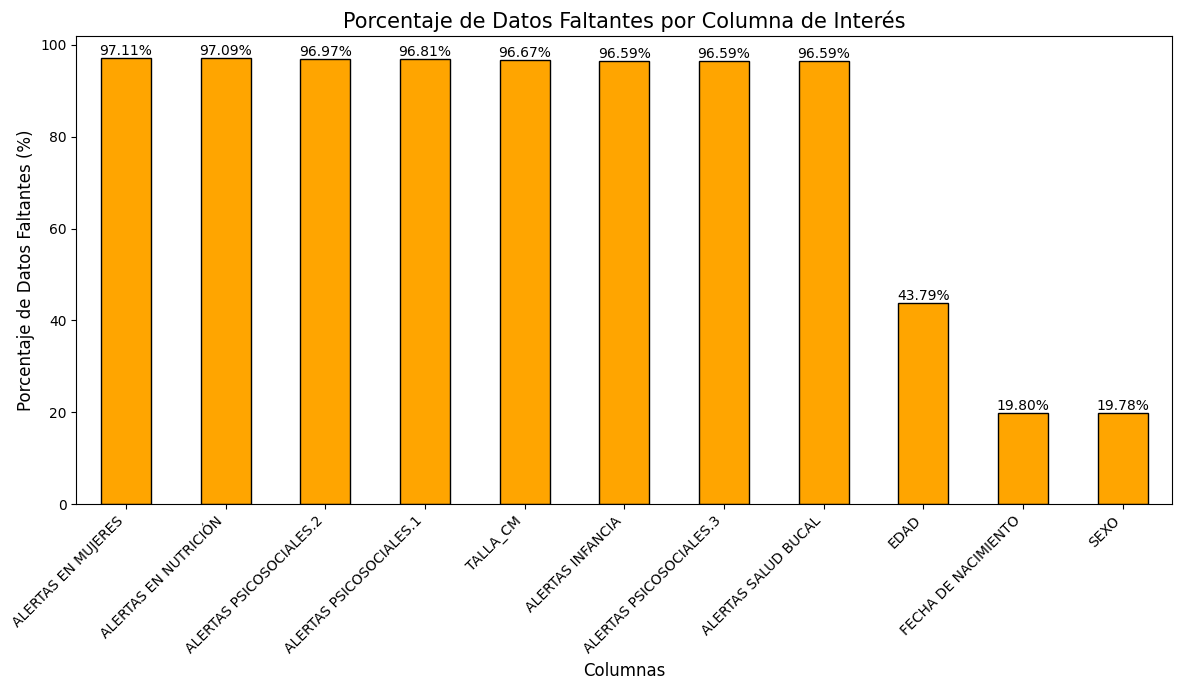

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Columnas de interés específicas (using the original names from df_bd)
columnas_interes = [
    'SEXO',
    'FECHA DE NACIMIENTO',
    'EDAD',
    'ALERTAS PSICOSOCIALES.1',
    'ALERTAS PSICOSOCIALES.2',
    'ALERTAS EN NUTRICIÓN',
    'ALERTAS PSICOSOCIALES.3',
    'ALERTAS SALUD BUCAL',
    'ALERTAS INFANCIA',
    'ALERTAS EN MUJERES',
    'TALLA_CM'
]

# Reemplazar '99999' por NaN en las columnas de interés (si no se hizo globalmente)
# NOTE: Assumes '99999' replacement to NaN was already done globally in cell b673df95
# If not, uncomment and adapt the following line:
# df_bd[columnas_interes] = df_bd[columnas_interes].replace(99999, np.nan)

# Calcular porcentaje de datos faltantes para las columnas de interés
porcentaje_na = (df_bd[columnas_interes].isnull().sum() / len(df_bd)) * 100

# Crear gráfico de barras
plt.figure(figsize=(12, 7))
porcentaje_na.sort_values(ascending=False).plot(kind='bar', color='orange', edgecolor='black') # Sort for better visualization
plt.title('Porcentaje de Datos Faltantes por Columna de Interés', fontsize=15)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Porcentaje de Datos Faltantes (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir etiquetas de porcentaje en cada barra
for i, v in enumerate(porcentaje_na.sort_values(ascending=False)):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

In [ ]:
# === Crear columna 'edad_final' inmediatamente después del bloque anterior ===

# Nombres exactos en df_bd
COL_EDAD = 'EDAD'
COL_FNAC = 'FECHA DE NACIMIENTO'
COL_FINT = 'Fecha_intervencion'

# Asegurar tipo datetime en las fechas (no rompe si ya lo son)
df_bd[COL_FNAC] = pd.to_datetime(df_bd[COL_FNAC], errors='coerce')
df_bd[COL_FINT] = pd.to_datetime(df_bd[COL_FINT], errors='coerce')

# Calcular edad por fechas (años cumplidos) cuando falte EDAD
ydiff = (df_bd[COL_FINT].dt.year - df_bd[COL_FNAC].dt.year)

cumplio = (
    (df_bd[COL_FINT].dt.month > df_bd[COL_FNAC].dt.month) |
    ((df_bd[COL_FINT].dt.month == df_bd[COL_FNAC].dt.month) &
     (df_bd[COL_FINT].dt.day   >= df_bd[COL_FNAC].dt.day))
)

edad_por_fechas = ydiff - (~cumplio).astype('Int64')  # años cumplidos (puede ser <NA> si falta fecha)

# Priorizar EDAD si no es nula; si lo es, usar edad_por_fechas
df_bd['edad_final'] = np.where(df_bd[COL_EDAD].notna(), df_bd[COL_EDAD], edad_por_fechas)

# Saneo: edades negativas o >120 -> NaN
df_bd.loc[(df_bd['edad_final'] < 0) | (df_bd['edad_final'] > 120), 'edad_final'] = np.nan

# Cast a entero "nullable"
df_bd['edad_final'] = pd.to_numeric(df_bd['edad_final'], errors='coerce').round(0).astype('Int64')

# Eliminar columnas originales de edad y fecha de nacimiento
df_bd.drop(columns=[COL_EDAD, COL_FNAC], inplace=True, errors='ignore')

print("✅ Columna 'edad_final' creada.")


✅ Columna 'edad_final' creada.


/tmp/ipython-input-1108797415.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bd['edad_final'] = np.where(df_bd[COL_EDAD].notna(), df_bd[COL_EDAD], edad_por_fechas)


Estandarización y Limpieza de la Base

In [ ]:
import re
import unicodedata

# ===== 1) Normalizar nombres de columnas (snake_case, sin acentos) =====
def normalize_col(name: str) -> str:
    # remueve prefijos/ruido como "Sub-Sección =>"
    name = re.sub(r'^\s*sub-secci[oó]n\s*=>\s*', '', str(name), flags=re.IGNORECASE)
    name = name.replace('=>', ' ')
    name = re.sub(r'^\.+', '', name)               # puntos al inicio
    name = re.sub(r'\s+', ' ', name).strip()       # espacios extra

    # minúsculas sin acentos
    name = ''.join(
        c for c in unicodedata.normalize('NFKD', name.lower())
        if not unicodedata.combining(c)
    )
    name = name.replace('%', 'porc')

    # no alfanumérico -> guion bajo
    name = re.sub(r'[^a-z0-9]+', '_', name).strip('_')
    return name

def make_unique(cols):
    seen, out = {}, []
    for c in cols:
        base = c
        if c in seen:
            seen[c] += 1
            c = f"{base}_{seen[base]}"
        else:
            seen[c] = 0
        out.append(c)
    return out

df = df_bd.copy()
df.columns = make_unique([normalize_col(c) for c in df.columns])

# ===== 2) Eliminar columnas con 100% de valores faltantes =====
cols_100_na = df.columns[df.isna().mean() >= 0.99].tolist()
df.drop(columns=cols_100_na, inplace=True)

# ===== 3) Eliminar datos de contacto  =====
patron_contacto = re.compile(r'(telefono|celular|correo|email|e_mail)', re.IGNORECASE)
cols_contacto = [c for c in df.columns if patron_contacto.search(c)]
df.drop(columns=cols_contacto, inplace=True, errors='ignore')

# ===== 4)  Resumen de lo hecho =====
print("🧹 Columnas eliminadas por 100% NA:", len(cols_100_na))
for c in cols_100_na: print(" -", c)
print("\n📵 Columnas de contacto eliminadas:", len(cols_contacto))
for c in cols_contacto: print(" -", c)

# Resultado final en df
df_limpio = df

🧹 Columnas eliminadas por 100% NA: 18
 - informacion_del_menor_nna_identificado_como_trabajador
 - razonabandonoescolar
 - pueblo
 - direccion_de_la_vivienda
 - especial
 - subgrupo_sisben
 - vereda
 - correo_2
 - ultima_intervencion
 - informacion_del_acudiente
 - informacion_laboral
 - especial_1
 - acompanamiento_2
 - acompanamiento_3
 - acompanamiento_4
 - intervencion_de_nino_nina_o_adolescente
 - resultados_de_la_intervencion
 - resultados_de_la_reposicion

📵 Columnas de contacto eliminadas: 3
 - telefono_1
 - telefono_2
 - correo_1


Anális de Alertas

In [ ]:
# 1️⃣ Identificar todas las columnas relacionadas con "alertas psicosociales"
cols_psico = [
    c for c in df_limpio.columns
    if re.search(r'alertas[_\s\.]*psicosocial', c, flags=re.IGNORECASE)
]

print("📋 Columnas psicosociales detectadas:")
for c in cols_psico:
    print(" -", c)

# 2️⃣ Crear la columna unificada con el último valor no nulo
if cols_psico: # Check if the list of columns is not empty
    df_limpio['alertas_psicosocial_unificada'] = df_limpio[cols_psico].bfill(axis=1).iloc[:, -1]

    # 3️⃣ Limpiar valores tipo "No aplica" (ej. '6. No aplica', '1.No aplica', etc.)
    df_limpio['alertas_psicosocial_unificada'] = df_limpio['alertas_psicosocial_unificada'].replace(
        to_replace=r'.*\bno\s*aplica\b.*', value=np.nan, regex=True
    )

    # 4️⃣ Eliminar las columnas originales
    df_limpio.drop(columns=cols_psico, inplace=True)

    # 5️⃣ Confirmar resultado
    print("\n✅ Nueva columna creada: alertas_psicosocial_unificada")
    print(f"🗑️ Se eliminaron {len(cols_psico)} columnas originales de alertas psicosociales.\n")
    print(df_limpio['alertas_psicosocial_unificada'].value_counts(dropna=False).head(10))
else:
    print("\n⚠️ No se encontraron columnas de alertas psicosociales después de la normalización.")
    print("No se creó la columna 'alertas_psicosocial_unificada' ni se eliminaron columnas.")

📋 Columnas psicosociales detectadas:
 - alertas_psicosociales
 - alertas_psicosociales_1
 - alertas_psicosociales_2
 - alertas_psicosociales_3

✅ Nueva columna creada: alertas_psicosocial_unificada
🗑️ Se eliminaron 4 columnas originales de alertas psicosociales.

alertas_psicosocial_unificada
NaN                                                                                                                54546
22- No aplica                                                                                                       1868
7- Pautas de crianza inadecuadas                                                                                      40
20- Sueño no reparador                                                                                                12
2- Factores de riesgo frente a problemas mentales por dificultades emocionales, comportamentales o relacionales        2
1- Factores de riesgo para trastornos mentales SRQ RQC                                               

In [ ]:
# Seleccionar columnas que contienen "alerta" en su nombre
cols_alerta = [c for c in df_limpio if 'alerta' in c.lower()]

# Revisar cuántas están llenas por fila
df_limpio['num_alertas_activas'] = df_limpio[cols_alerta].notna().sum(axis=1)

# Contar cuántas filas tienen más de una alerta
num_filas_multi_alertas = (df_limpio['num_alertas_activas'] > 1).sum()

print(f"📊 Número total de filas con más de una alerta: {num_filas_multi_alertas}")

# Porcentaje filas tienen más de una alerta a la vez
multi_alertas = (df_limpio['num_alertas_activas'] > 1).mean() * 100

print(f"Porcentaje de filas con más de una alerta simultánea: {multi_alertas:.2f}%")

# 2️⃣ Calcular cuántas filas tienen al menos una alerta no nula
filas_con_alerta = df_limpio[cols_alerta].notna().any(axis=1)

# 3️⃣ Calcular el porcentaje sobre el total de filas
porcentaje_filas_con_alerta = filas_con_alerta.mean() * 100

# 4️⃣ Mostrar resultado
print(f"📊 Porcentaje de filas con al menos una alerta: {porcentaje_filas_con_alerta:.2f}%")

📊 Número total de filas con más de una alerta: 1928
Porcentaje de filas con más de una alerta simultánea: 3.41%
📊 Porcentaje de filas con al menos una alerta: 3.41%


In [ ]:
import pandas as pd
import re

# 1) Detectar columnas que contienen 'alerta' (omitir 'num_alertas_activas')
cols_alerta = [
    c for c in df_limpio.columns
    if 'alerta' in c.lower() and 'num_alertas_activas' not in c.lower()
]
total_filas = len(df_limpio)

# 2) Patrón robusto para "No aplica" en cualquier forma (e.g., "6. No aplica", "1.No aplica")
patron_no_aplica = re.compile(r'\bno\s*aplica\b', re.IGNORECASE)

# 3) Construir resumen por columna
res = []
for c in cols_alerta:
    s = df_limpio[c]

    # máscaras
    mask_non_null = s.notna()
    # trabajar solo sobre no nulos para evaluar "no aplica"
    s_str = s[mask_non_null].astype(str).str.strip().str.casefold()

    # no aplica (entre los no nulos)
    num_no_aplica = s_str.str.contains(patron_no_aplica).sum()

    # aplica alerta (no nulos distintos de no aplica)
    num_no_nulos = int(mask_non_null.sum())
    num_aplica = num_no_nulos - num_no_aplica

    # nulos
    num_nulos = total_filas - num_no_nulos

    # válidos = no nulos
    num_validos = num_no_nulos

    # porcentajes
    pct_no_aplica = (num_no_aplica / total_filas) * 100
    pct_aplica    = (num_aplica    / total_filas) * 100
    pct_validos   = (num_validos   / total_filas) * 100
    pct_nulos     = (num_nulos     / total_filas) * 100

    res.append({
        'col_alerta': c,
        'total_filas': total_filas,
        'nulos': num_nulos,
        'no_aplica_alerta': num_no_aplica,
        'aplica_alerta': num_aplica,
        'validos': num_validos,                 # = no nulos
        'pct_nulos': round(pct_nulos, 2),
        'pct_no_aplica_alerta': round(pct_no_aplica, 2),
        'pct_aplica_alerta': round(pct_aplica, 2),
        'pct_validos': round(pct_validos, 2)
    })

df_alertas_qc = (
    pd.DataFrame(res)
    .sort_values(by='pct_aplica_alerta', ascending=False)
    .reset_index(drop=True)
)

print("📊 Porcentaje por tipo de alerta (Nulos / No aplica alerta / Aplica alerta). Válidos = No nulos.")
display(df_alertas_qc)



📊 Porcentaje por tipo de alerta (Nulos / No aplica alerta / Aplica alerta). Válidos = No nulos.


,col_alerta,total_filas,nulos,no_aplica_alerta,aplica_alerta,validos,pct_nulos,pct_no_aplica_alerta,pct_aplica_alerta,pct_validos
0,alertas_salud_bucal,56473,54545,303,1625,1928,96.59,0.54,2.88,3.41
1,alertas_infancia,56473,54546,1733,194,1927,96.59,3.07,0.34,3.41
2,alertas_en_nutricion,56473,54829,1485,159,1644,97.09,2.63,0.28,2.91
3,alertas_psicosocial_unificada,56473,54546,1868,59,1927,96.59,3.31,0.10,3.41
4,alertas_en_mujeres,56473,54841,1592,40,1632,97.11,2.82,0.07,2.89


Por el porcentaje de datos completos, se propone construir un modelo para detectar alertas en casos generales

In [ ]:
import numpy as np

# Normalizar celda conservando NaN
def _norm_cell(x):
    if pd.isna(x):
        return np.nan
    return str(x).strip().casefold()

# 1) Normalizar texto en columnas de alerta sin romper NaN
df_alertas_norm = df_limpio[cols_alerta].applymap(_norm_cell)

# 2) Marcar "No aplica" (en cualquier forma) y tratarlo como NaN para evaluar "aplica"
mask_no_aplica = df_alertas_norm.apply(lambda s: s.str.contains(patron_no_aplica, na=False))
df_alertas_valid = df_alertas_norm.mask(mask_no_aplica, other=np.nan)

# 3) Flags por fila
has_any_response = df_alertas_norm.notna().any(axis=1)   # hay alguna respuesta (aplica o "no aplica")
has_any_valid    = df_alertas_valid.notna().any(axis=1)  # hay alguna alerta que APLICA (válida)

# 4) Crear columna binaria y omitir filas totalmente NA en alertas
df_limpio['tiene_alerta'] = np.where(has_any_valid, 1, 0)
df_modelo = df_limpio[has_any_response].copy()  # omite filas donde todas las alertas son NaN

# 5) Chequeo
print("Distribución tiene_alerta (0/1) en df_modelo:")
print(df_modelo['tiene_alerta'].value_counts(dropna=False))
print(f"\ndf_modelo: {df_modelo.shape[0]} filas x {df_modelo.shape[1]} columnas (sin filas totalmente nulas en alertas)")


/tmp/ipython-input-4102184749.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_alertas_norm = df_limpio[cols_alerta].applymap(_norm_cell)


Distribución tiene_alerta (0/1) en df_modelo:
tiene_alerta
1    1664
0     264
Name: count, dtype: int64

df_modelo: 1928 filas x 92 columnas (sin filas totalmente nulas en alertas)


In [ ]:
n_rows, n_cols = df_modelo.shape
total_celdas = n_rows * n_cols
na_total = df_modelo.isna().sum().sum()
pct_na_total = (na_total / total_celdas) * 100

print("=== Resumen global ===")
print(f"Filas: {n_rows:,} | Columnas: {n_cols:,}")
print(f"Celdas totales: {total_celdas:,}")
print(f"Celdas con NA: {na_total:,} ({pct_na_total:.2f}%)")

# ==================================
# 2) Faltantes por columna (conteo %)
# ==================================
na_cols_cnt = df_modelo.isna().sum()
na_cols_pct = df_modelo.isna().mean() * 100

df_na_cols = (
    pd.DataFrame({
        'columna': df_modelo.columns,
        'na_count': na_cols_cnt.values,
        'na_pct': na_cols_pct.values
    })
    .sort_values('na_pct', ascending=False)
    .reset_index(drop=True)
)

print("\n=== Columnas con NA (ordenadas por % NA desc) ===")
display(df_na_cols[df_na_cols['na_count'] > 0])

=== Resumen global ===
Filas: 1,928 | Columnas: 92
Celdas totales: 177,376
Celdas con NA: 33,451 (18.86%)

=== Columnas con NA (ordenadas por % NA desc) ===


,columna,na_count,na_pct
0,informacion_del_menor,1928,100.000000
1,tipo_intervencion,1928,100.000000
2,personas_a_cargo,1928,100.000000
3,curso_de_vida,1928,100.000000
4,idniveleducativo,1928,100.000000
5,adolescente_trabajo_protegido,1928,100.000000
6,en_donde_realiza_principalmente_su_trabajo,1928,100.000000
7,nna_desvinculado_de_la_actividad_laboral_1,1928,100.000000
8,adolescente_trabajo_protegido_1,1928,100.000000
9,direccion_del_trabajo,1928,100.000000


In [ ]:
# Corregir el print y asegurar el filtro
df_modelo = df_modelo[df_modelo['peso'].notna()].copy()
print(f"Filas con edad_final: {df_modelo.shape[0]}")

# Columnas 100% diligenciadas
cols_100_ok = df_modelo.columns[df_modelo.isna().sum() == 0].tolist()

print(f"✅ Columnas 100% diligenciadas ({len(cols_100_ok)}):")
for i, c in enumerate(cols_100_ok, 1):
    print(f"{i:2d}. {c}")

# =========================
# Tipos de columnas (dtypes)
# =========================

# Filter the base to only those columns plus 'edad_final'
cols_to_keep = cols_100_ok + ['edad_final']
# Ensure 'edad_final' is not duplicated if it's already in cols_100_ok
cols_to_keep = list(dict.fromkeys(cols_to_keep))
df_modelo = df_modelo[cols_to_keep].copy()


print("\n📦 Tipos de columna (dtypes):")
for col, dt in df_modelo.dtypes.items():
    print(f"{col:50s} -> {dt}")

# Resumen de dtypes
print("\nResumen de dtypes:")
print(df_modelo.dtypes.value_counts())

# (Opcional) Listar columnas no numéricas y numéricas
non_numeric = df_modelo.select_dtypes(exclude=['number', 'bool', 'datetime']).columns.tolist()
numeric     = df_modelo.select_dtypes(include=['number']).columns.tolist()
datetimes   = df_modelo.select_dtypes(include=['datetime']).columns.tolist()
booleans    = df_modelo.select_dtypes(include=['bool']).columns.tolist()

print(f"\n🧾 Columnas no numéricas ({len(non_numeric)}): {non_numeric}")
print(f"🔢 Columnas numéricas ({len(numeric)}): {numeric}")
print(f"🗓️  Columnas datetime ({len(datetimes)}): {datetimes}")

Filas con edad_final: 1880
✅ Columnas 100% diligenciadas (47):
 1. id_fic
 2. base_origen
 3. ficha_fic
 4. fecha_intervencion
 5. localidad_fic
 6. red_fic
 7. usuario
 8. perfil
 9. tipo_intervencion_1
10. nacionalidad
11. sexo
12. genero
13. estado_civil
14. etnia
15. poblacion_diferencial_y_de_inclusion
16. ocupacion
17. categorias_de_la_discapacidad
18. vinculo_con_el_jefe_de_hogar
19. afiliacion_al_sgsss
20. zona
21. localidad
22. upz_upr
23. barrio
24. barrio_priorizado
25. manzana_del_cuidado
26. estrato
27. afiliacion_al_sgsss_1
28. estrato_socioeconomico
29. zona_1
30. localidad_1
31. upz_upr_1
32. barrio_1
33. barrio_priorizado_1
34. manzana_del_cuidado_1
35. nombre_de_la_ut
36. perfil_3
37. temas_tratados_2
38. iec_3
39. fecha_2
40. alertas_salud_bucal
41. alertas_infancia
42. peso
43. talla_cm
44. fecha_seguimiento_cierre
45. fecha_reposicion_de_psicologo_o_trabajador_social_posterior_al_seguimiento_cierre
46. num_alertas_activas
47. tiene_alerta

📦 Tipos de columna (dtype

Codígo del modelo

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support

# ======================
# 0) Configuración
# ======================
COLS = ['tiene_alerta','edad_final','talla_cm','sexo','estrato','localidad']
FORMULA = "tiene_alerta ~ edad_final + talla_cm + C(sexo) + C(estrato) + C(localidad)"

# ======================
# 1) Subset + limpieza
# ======================
df_glm = (
    df_modelo[COLS]
    .dropna(subset=COLS)
    .copy()
)
df_glm['tiene_alerta'] = df_glm['tiene_alerta'].astype(int)
df_glm['edad_final']   = pd.to_numeric(df_glm['edad_final'], errors='coerce')
df_glm['talla_cm']     = pd.to_numeric(df_glm['talla_cm'], errors='coerce')

# ======================
# 2) Agrupar niveles raros (evita separación)
# ======================

# ======================
# 3) Train/Test split
# ======================
X_train, X_test = train_test_split(df_glm, test_size=0.20, random_state=42, stratify=df_glm['tiene_alerta'])

# ======================


# ======================
# 5) Re-entrenar con TODO el dataset y alpha óptimo
# ======================
model_full = smf.glm(formula=FORMULA, data=df_glm, family=sm.families.Binomial())
res = model_full.fit()


print("\n=== Resumen compacto (coef / OR) ===")
coef = res.params
or_table = pd.DataFrame({
    "param": coef.index,
    "coef": coef.values,
    "odds_ratio": np.exp(coef.values)
}).sort_values("odds_ratio", ascending=False)
display(or_table)

# ======================
# 6) Indicador de riesgo (IRA) y mejor umbral operativo
# ======================
df_glm['p_alerta'] = res.predict(df_glm)
df_glm['IRA_alerta'] = (100*df_glm['p_alerta']).round(1)

# Barrido de umbral: macro-F1 (equilibra clases)
grid = np.linspace(0.1, 0.9, 17)
y_true_all = df_glm['tiene_alerta'].values
best_f1, best_thr = -1, None
for t in grid:
    y_hat = (df_glm['p_alerta'] >= t).astype(int)
    p0,r0,f10,_ = precision_recall_fscore_support(y_true_all, y_hat, average='binary', pos_label=0, zero_division=0)
    p1,r1,f11,_ = precision_recall_fscore_support(y_true_all, y_hat, average='binary', pos_label=1, zero_division=0)
    macro_f1 = (f10 + f11)/2
    if macro_f1 > best_f1:
        best_f1, best_thr = macro_f1, t

print(f"\nUmbral sugerido (macro-F1): {best_thr:.2f} | macro-F1={best_f1:.3f}")

# Clasificación con el umbral óptimo
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
y_hat_all = (df_glm['p_alerta'] >= best_thr).astype(int)
print(f"AUC global (con p_alerta): {roc_auc_score(y_true_all, df_glm['p_alerta']):.3f}")
print("Matriz de confusión (umbral óptimo):\n", confusion_matrix(y_true_all, y_hat_all))
print("\nReporte de clasificación (umbral óptimo):\n", classification_report(y_true_all, y_hat_all, digits=3))

# (Opcional) categorizar el indicador
bins = [0, 33, 66, 100.0001]
labels = ['bajo','medio','alto']
df_glm['IRA_categoria'] = pd.cut(df_glm['IRA_alerta'], bins=bins, labels=labels, right=False)

# Vista final
df_glm[['tiene_alerta','edad_final','talla_cm','sexo','estrato','localidad','p_alerta','IRA_alerta','IRA_categoria']].head()


=== Resumen compacto (coef / OR) ===


,param,coef,odds_ratio
19,C(localidad)[T.5- Usme],25.596595,1.307555e+11
20,C(localidad)[T.6- Tunjuelito],25.578599,1.284234e+11
12,C(localidad)[T.17- La Candelaria],25.522414,1.214070e+11
16,C(localidad)[T.21- Fuera de la ciudad],25.409987,1.084969e+11
8,C(localidad)[T.13- Teusaquillo],25.238421,9.139172e+10
18,C(localidad)[T.4- San Cristóbal],3.819699,4.559050e+01
21,C(localidad)[T.7- Bosa],3.720232,4.127396e+01
14,C(localidad)[T.19- Ciudad Bolivar],3.257424,2.598252e+01
17,C(localidad)[T.3- Santa Fe],2.943772,1.898734e+01
22,C(localidad)[T.8- Kennedy],2.777828,1.608405e+01



Umbral sugerido (macro-F1): 0.70 | macro-F1=0.763
AUC global (con p_alerta): 0.879
Matriz de confusión (umbral óptimo):
 [[ 176   74]
 [ 161 1468]]

Reporte de clasificación (umbral óptimo):
               precision    recall  f1-score   support

           0      0.522     0.704     0.600       250
           1      0.952     0.901     0.926      1629

    accuracy                          0.875      1879
   macro avg      0.737     0.803     0.763      1879
weighted avg      0.895     0.875     0.882      1879



,tiene_alerta,edad_final,talla_cm,sexo,estrato,localidad,p_alerta,IRA_alerta,IRA_categoria
0,1,0,69.0,1- Hombre,2. Bajo,19- Ciudad Bolivar,0.937268,93.7,alto
1,1,5,97.0,2- Mujer,2. Bajo,19- Ciudad Bolivar,0.951020,95.1,alto
2,1,10,124.0,2- Mujer,2. Bajo,19- Ciudad Bolivar,0.963877,96.4,alto
3,1,4,108.0,2- Mujer,2. Bajo,6- Tunjuelito,1.000000,100.0,alto
4,1,8,135.0,2- Mujer,2. Bajo,19- Ciudad Bolivar,0.965776,96.6,alto


Rendimiento (sobre 1,879 filas)

AUC = 0.879 → poder de discriminación fuerte: el score ordena muy bien quién tendrá alerta y quién no.

Umbral óptimo (macro-F1): 0.70 → equilibra bien ambas clases.

Matriz (t=0.70): [[TN=176, FP=74],[FN=161, TP=1468]]

Clase 1 (con alerta): precision 0.952, recall 0.901, F1 0.926 → ¡excelente!

Clase 0 (sin alerta): precision 0.522, recall 0.704, F1 0.600 → aceptable para clase minoritaria.

Accuracy 0.875 (con base desbalanceada) y macro-F1 0.763 (promedio equilibrado): buen desempeño global.

Coeficientes / OR (drivers)

Localidad domina el riesgo:

OR descomunales (≈1e11) para Usme, Tunjuelito, La Candelaria, Fuera de la ciudad, Teusaquillo → esto es separación o cuasi-separación: en train casi todos los casos de ese nivel son 1 (o hay muy pocos 0). Resultado: coeficientes se van “al infinito”.

Otros con efecto alto (pero razonable): San Cristóbal, Bosa, Ciudad Bolívar, Santa Fe, Kennedy (OR ≈ 11–46).

Barrios Unidos sale protector (OR ≈ 0.29).

Estrato:

estrato 4. Medio → OR ≈ 1.5e-11 (coef −24.94): separación al revés (casi todos 0). Indicio de nivel raro o mal balanceado.

estrato 2 y 3 ~ neutros/ligeeeramente >1.

Edad y Talla (cm):

Efectos pequeños y positivos: edad_final OR ≈ 1.018 por año; talla_cm OR ≈ 1.008 por cm. Señal débil.

Sexo (Mujer): OR ≈ 0.94 (ligeramente menor riesgo; no dominante).

# Graficas

/tmp/ipython-input-2272251266.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alert_proportion_by_localidad_pct.index, y=alert_proportion_by_localidad_pct.values, palette='viridis')


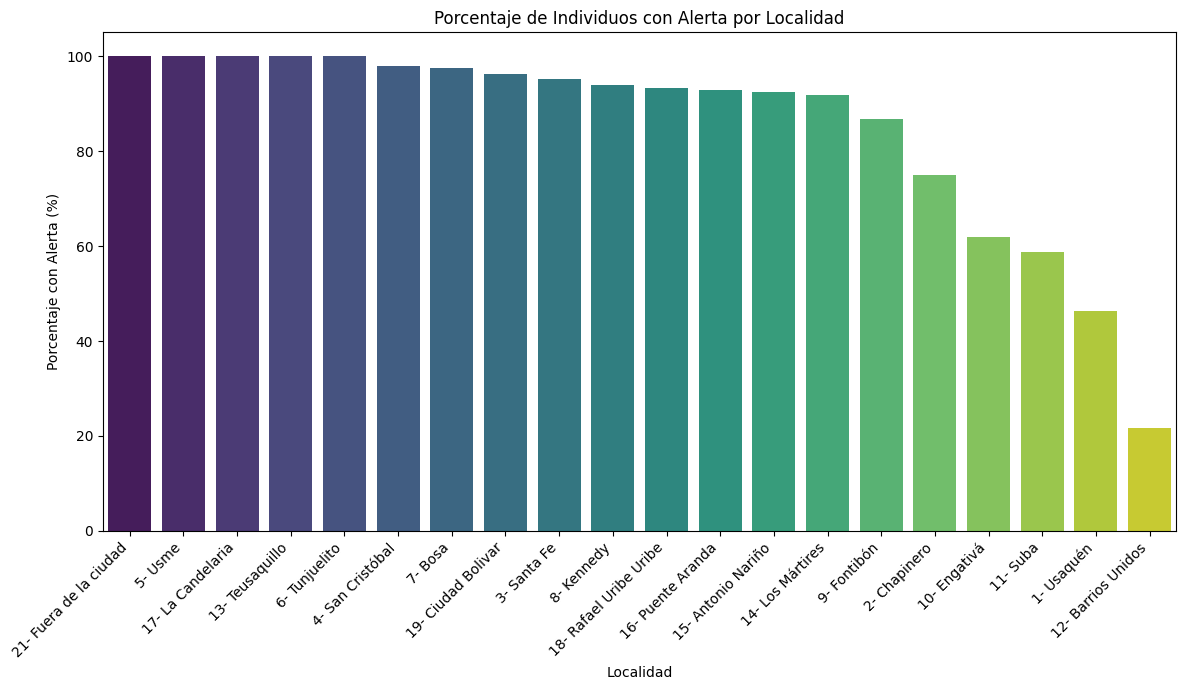

In [ ]:
# Calculate the proportion of 'tiene_alerta' (where it's 1) for each locality
alert_proportion_by_localidad = df_glm.groupby('localidad')['tiene_alerta'].mean().sort_values(ascending=False)

# Convert to percentage for better interpretation
alert_proportion_by_localidad_pct = alert_proportion_by_localidad * 100

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=alert_proportion_by_localidad_pct.index, y=alert_proportion_by_localidad_pct.values, palette='viridis')
plt.title('Porcentaje de Individuos con Alerta por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Porcentaje con Alerta (%)')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()
plt.show()

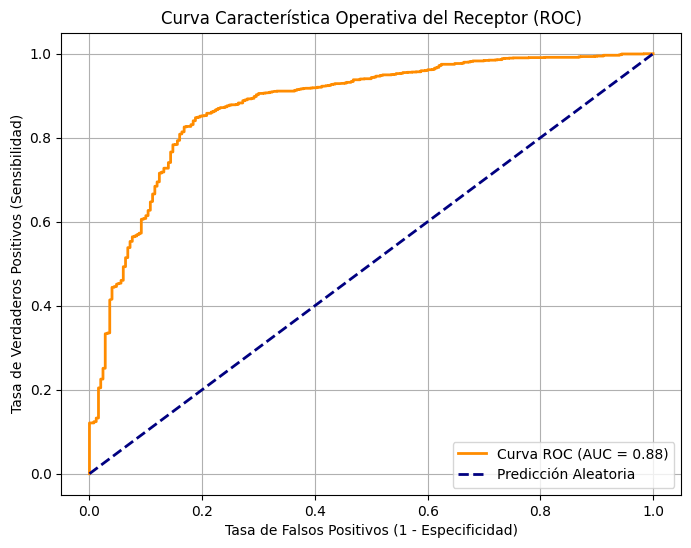

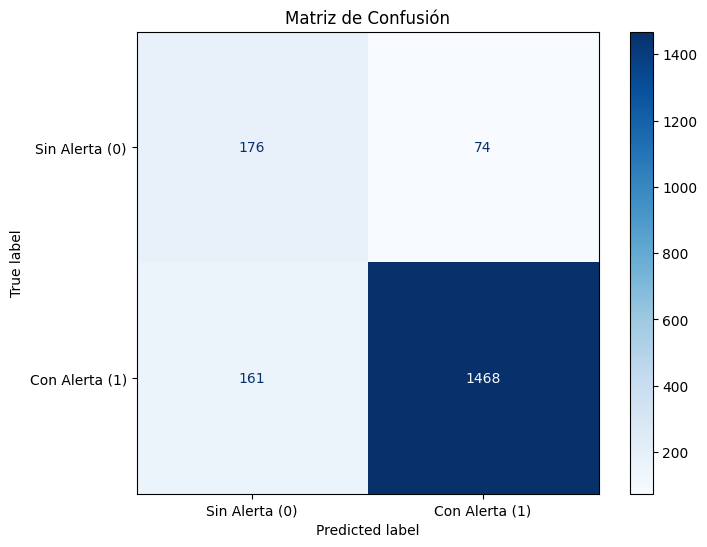

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities from the model (assuming res is your GLM results object from cell 1LGUnZ2yZQ9M)
# If res is not available, you might need to re-run the model training cell or load predictions
y_true = df_glm['tiene_alerta'].values
y_pred_proba = res.predict(df_glm)

# === ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})') # Translated label
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Predicción Aleatoria') # Translated label
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)') # Translated xlabel
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)') # Translated ylabel
plt.title('Curva Característica Operativa del Receptor (ROC)') # Translated title
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# === Confusion Matrix Heatmap ===
# Assuming y_hat_all from cell 1LGUnZ2yZQ9M contains predictions at the best threshold
# If not, you'll need to re-calculate it using the best_thr from the previous analysis
# For this example, we'll use the predictions already calculated if available,
# otherwise we'll re-calculate using a default threshold (or the best_thr if it's in scope)
try:
    y_pred_class = y_hat_all # Use the predictions from the previous cell if available
except NameError:
    # Re-calculate if y_hat_all is not in scope
    best_thr = 0.7 # Using the best_thr found previously as a fallback
    y_pred_class = (y_pred_proba >= best_thr).astype(int)


cm = confusion_matrix(y_true, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sin Alerta (0)', 'Con Alerta (1)']) # Translated display_labels

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Matriz de Confusión') # Translated title
plt.grid(False) # Turn off grid for heatmap
plt.show()

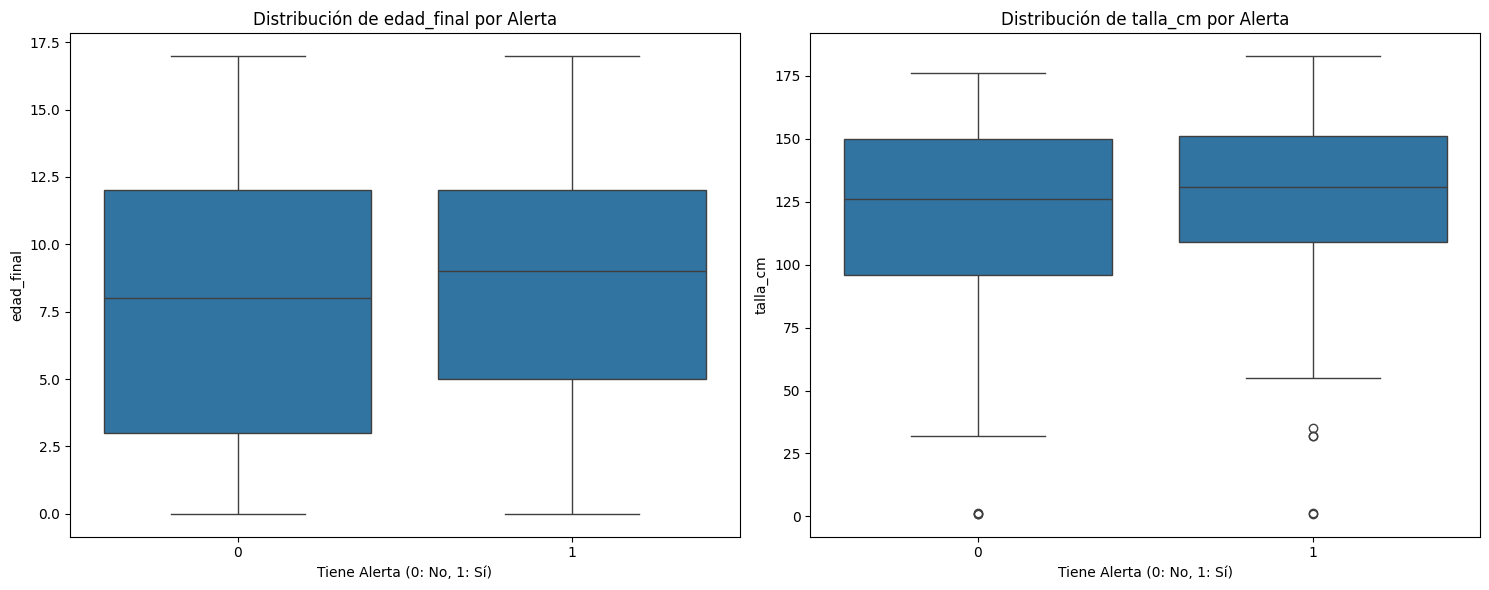

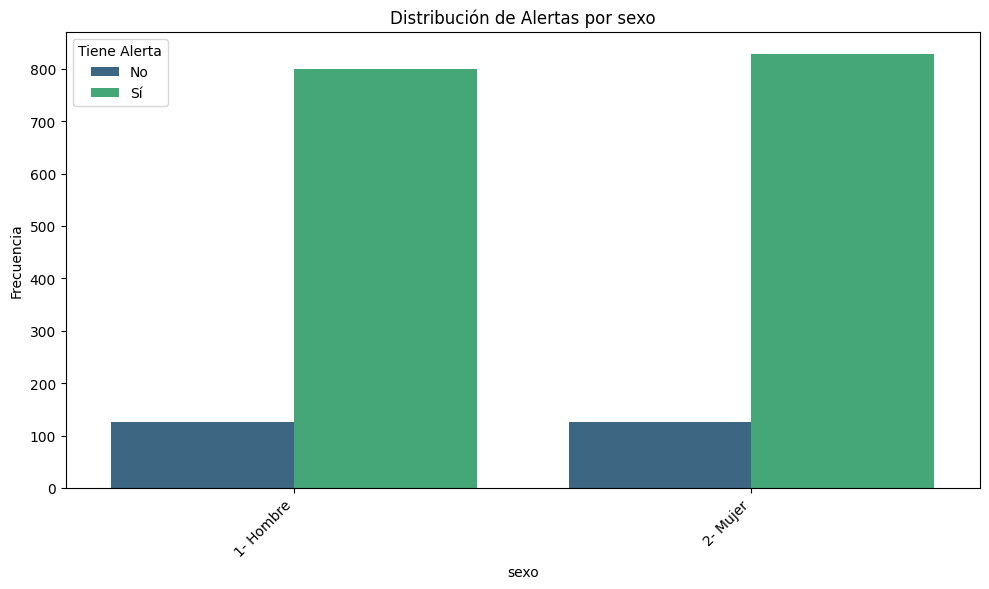

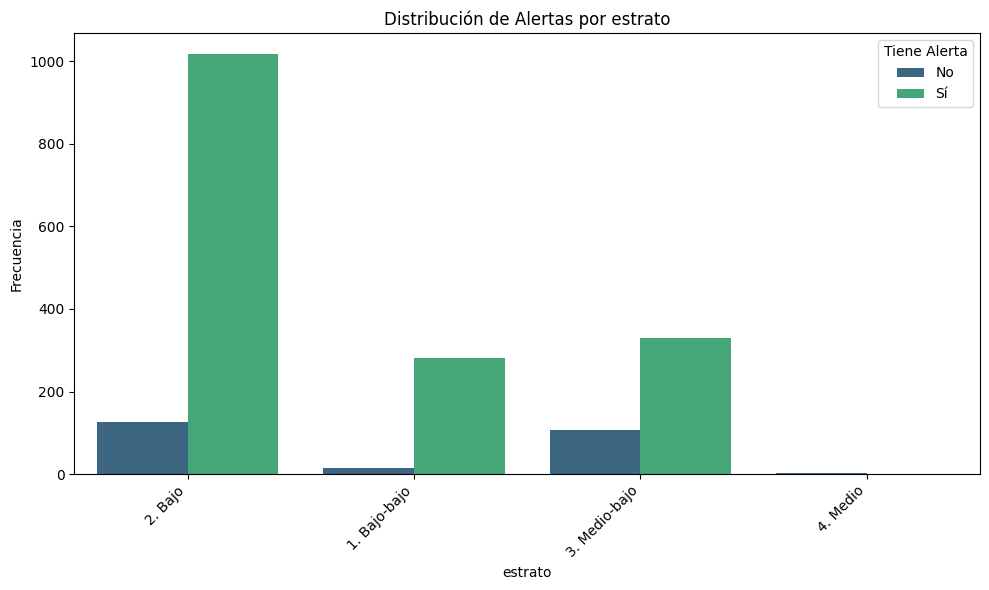

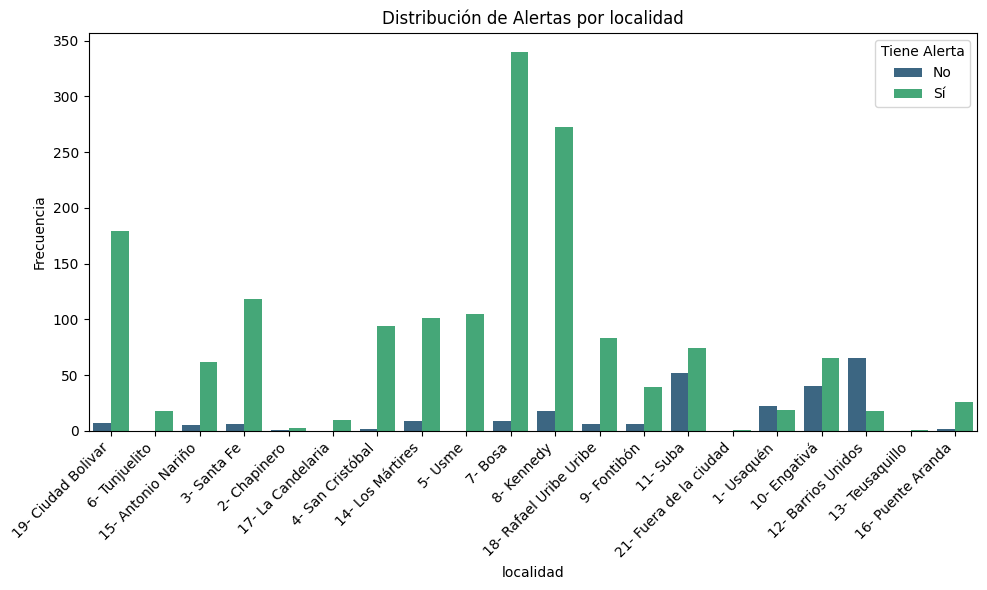

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for numerical variables vs. 'tiene_alerta'
numerical_cols = ['edad_final', 'talla_cm']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_glm, x='tiene_alerta', y=col, ax=axes[i])
    axes[i].set_title(f'Distribución de {col} por Alerta')
    axes[i].set_xlabel('Tiene Alerta (0: No, 1: Sí)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

# Stacked bar plots for categorical variables vs. 'tiene_alerta'
categorical_cols = ['sexo', 'estrato', 'localidad']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_glm, x=col, hue='tiene_alerta', palette='viridis')
    plt.title(f'Distribución de Alertas por {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.legend(title='Tiene Alerta', labels=['No', 'Sí'])
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3877638840.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_glm, y=col, ax=axes[i], order=df_glm[col].value_counts().index, palette='viridis')
/tmp/ipython-input-3877638840.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_glm, y=col, ax=axes[i], order=df_glm[col].value_counts().index, palette='viridis')
/tmp/ipython-input-3877638840.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_glm, y=col, ax=axes[i], order=df_glm[col].value_counts().index, palette='viridis')


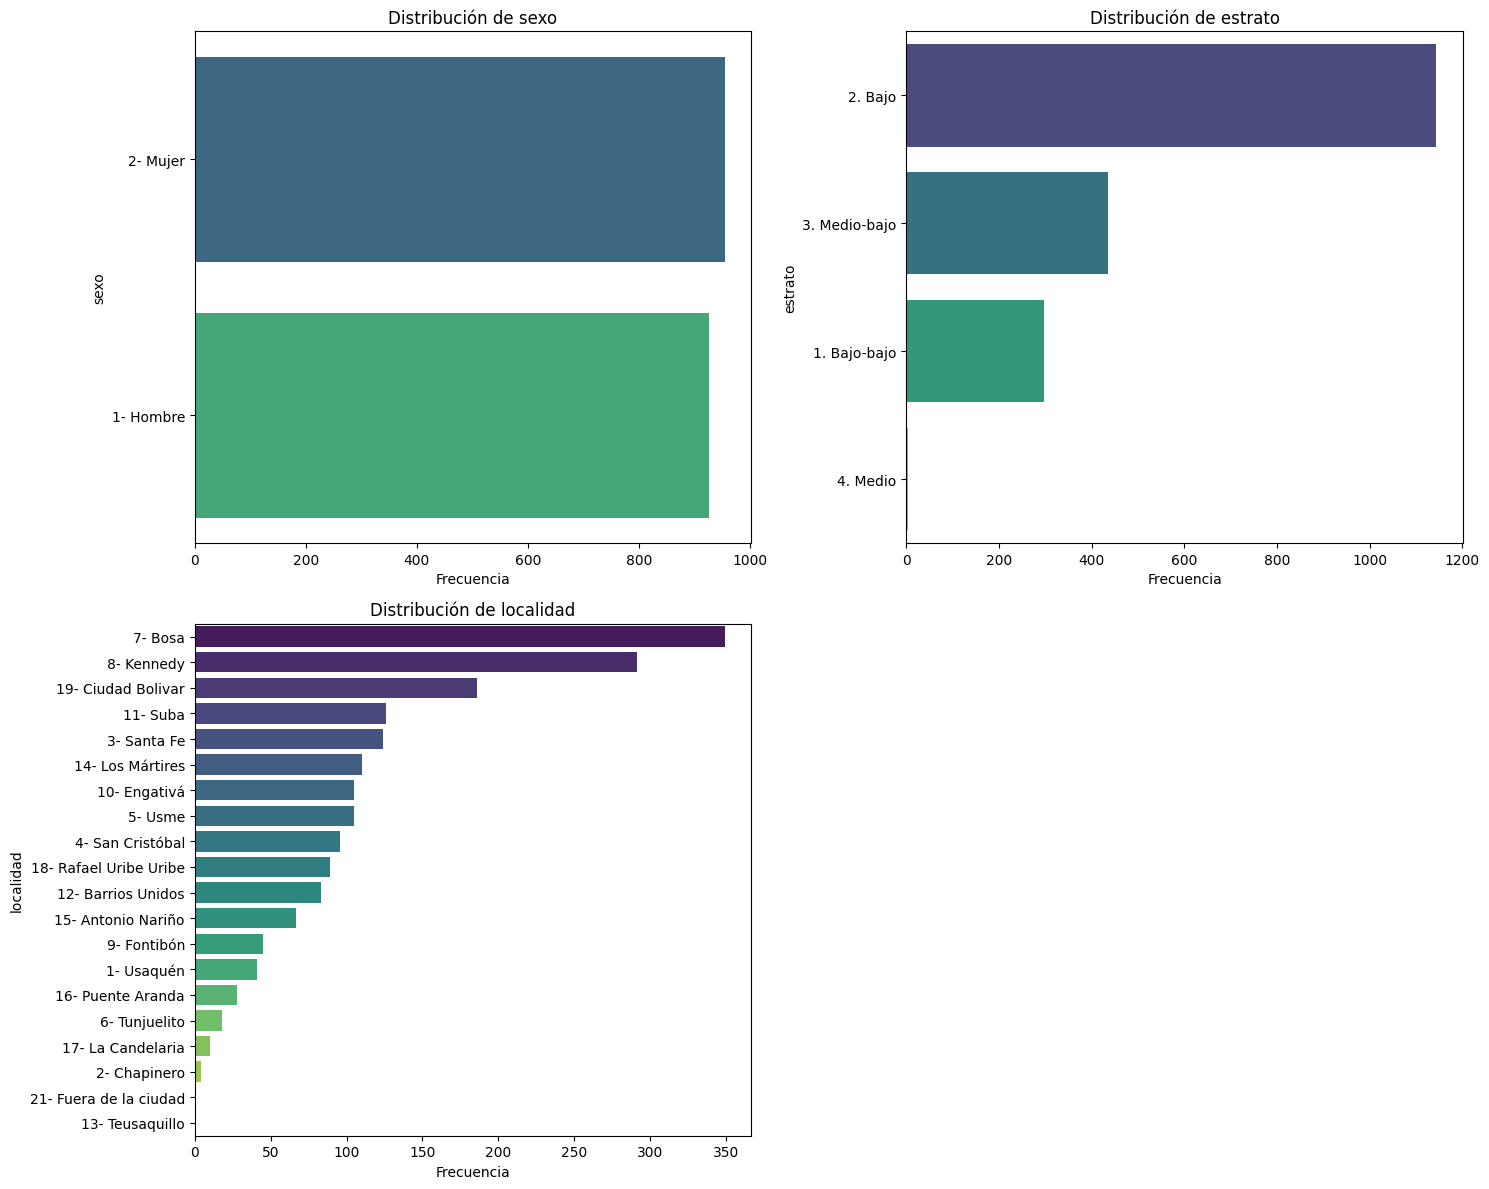

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['sexo', 'estrato', 'localidad']
n_cols = len(categorical_cols)
n_rows = (n_cols + 1) // 2  # Arrange plots in 2 columns

fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 6))
axes = axes.flatten() # Flatten the array of axes for easy iteration

for i, col in enumerate(categorical_cols):
    if i < len(axes): # Ensure we don't go out of bounds if there's an odd number of plots
        sns.countplot(data=df_glm, y=col, ax=axes[i], order=df_glm[col].value_counts().index, palette='viridis')
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel('Frecuencia')
        axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()